1. load dataset: xyz files 
2. represent dataset from xyz coordinates to 2D matrix X and pass kernel functions to get feature Matrix X
3. use X to practice some unsupervised ML: clustering

4. Load labels Y
5. Apply Supervised Machine Learning Algorithms to predict new samples 

NEXT#

convert each mol to a graph, 

embed the whole graph(previous work has focus on node embedding),

compare the performance of same algorithms based on qml.representation and graph embedding,


convert xyz to smile string type,

apply ml algorithms to string,

comprehensively consider which representation is better? pros and cons? 

does graph for molecule have advantages? 



In [ ]:
!pip install qml
import random
import os
import numpy as np
import qml

from __future__ import print_function

import sys
print("Printing version info for help reporting bugs")
print("Python version:", sys.version)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

try:
    import qml
    from qml.kernels import gaussian_kernel
    from qml.kernels import laplacian_kernel
    from qml.math import cho_solve
    from qml.kernels import gaussian_kernel   
    from qml.representations import get_slatm_mbtypes
    print("QML version:",qml.__version__)
except ImportError:
    print("Failed to find QML")
    print("Please follow instructions here: http://www.qmlcode.org/installation.html")

Printing version info for help reporting bugs
Python version: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
QML version: 0.2.1


Load dataset 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# access dataset and txt files from drive

In [ ]:
#sorted(os.listdir("/content/drive/MyDrive/data/qm7/"))

In [ ]:
compounds = [qml.Compound(xyz="/content/drive/MyDrive/data/qm7/"+f) for f in sorted(os.listdir("/content/drive/MyDrive/data/qm7/"))]
 

In [ ]:
for mol in compounds:
  #mol.generate_coulomb_matrix(size=5, sorting="row-norm")
  #print(mol.representation)
  print(mol.name)
  print(mol.coordinates)
  print(mol.atomtypes)
  print(mol.nuclear_charges)
  print(mol.unit_cell)

/content/drive/MyDrive/qm7/0001.xyz
[[ 1.041682 -0.0562   -0.071481]
 [ 2.130894 -0.056202 -0.071496]
 [ 0.678598  0.174941 -1.072044]
 [ 0.678613  0.694746  0.62898 ]
 [ 0.678614 -1.038285  0.228641]]
['C', 'H', 'H', 'H', 'H']
[6 1 1 1 1]
None
/content/drive/MyDrive/qm7/0002.xyz
[[ 0.995914  0.011511 -0.099221]
 [ 2.514686  0.011466 -0.099226]
 [ 0.597259  0.729877 -0.819596]
 [ 0.597259  0.27617   0.883106]
 [ 0.597278 -0.971531 -0.361167]
 [ 2.913322  0.994509  0.162719]
 [ 2.913341 -0.253192 -1.081553]
 [ 2.913341 -0.7069    0.621148]]
['C', 'C', 'H', 'H', 'H', 'H', 'H', 'H']
[6 6 1 1 1 1 1 1]
None
/content/drive/MyDrive/qm7/0003.xyz
[[ 0.936129  0.030833 -0.07433 ]
 [ 2.259141  0.030833 -0.07433 ]
 [ 0.366617  0.952941 -0.118252]
 [ 0.366617 -0.891275 -0.030418]
 [ 2.828653  0.952941 -0.118252]
 [ 2.828653 -0.891275 -0.030418]]
['C', 'C', 'H', 'H', 'H', 'H']
[6 6 1 1 1 1]
None
/content/drive/MyDrive/qm7/0004.xyz
[[ 0.899231 -0.0226    0.0041  ]
 [ 2.096269 -0.0226    0.0041  ]
 [-

Represent xyz molecules into 2D matrix

In [ ]:
mbtypes = get_slatm_mbtypes([mol.nuclear_charges for mol in compounds])

# For every compound generate a coulomb matrix or BoB
for mol in compounds:
    # you can select other descriptors here
    # full list here http://www.qmlcode.org/qml.html#module-qml.representations
    mol.generate_coulomb_matrix(size=23, sorting="row-norm")
    # mol.generate_slatm(mbtypes, local=False)
    # mol.generate_bob(size=23, asize={"O":3, "C":7, "N":3, "H":16, "S":1})

    # convert each mol to a vector as representaion by qml representation

    # mol to graph > embed the whole graph into a vector
    # previously work are about node embedding: each node correponding a vector 
    # now consider how to embed the whole graph into a vector

    # the traditional ML: 
    # X matrix: each row correponding a sample
    # y: label for each row in X




# Make a big 2D array with all the representations
X = np.array([mol.representation for mol in compounds])
# Print all representations
print("after passing representations: ")
print(X.shape)


sigma = 1000
gamma = 1.0/(2*sigma**2)
alpha = 1e-8
#kernel = KernelRidge(gamma=gamma, kernel="rbf", alpha=alpha)
# find the fitting coeffecients
#kernel.fit(X_train, y_train)


# K is also a Numpy array
# K = gaussian_kernel(X, X, sigma)
K = laplacian_kernel(X, X, sigma)
# Print the kernel
# print(K)
print("after passing kernels: ")
print(K.shape)

# features from 276 to 50

after passing representations: 
(50, 276)
after passing kernels: 
(50, 50)


By now X is obtained, next to practice clustering 
unsupervised machine learning 

In [ ]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(3, affinity='precomputed', n_init=100,assign_labels='discretize')
sc.fit_predict(K)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.mixture import GaussianMixture
#gm = GaussianMixture(n_components=3, random_state=0).fit(K)
#gm.means_
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_


array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

Labels: get Y

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/data/hof_qm7.txt", sep=" ", header=None)
data.columns = ["mol", "dft", "delta"]

In [ ]:
data.head(50)

,mol,dft,delta
0,qm7/0001.xyz,-417.031,-431.787272
1,qm7/0002.xyz,-711.117,-730.835895
2,qm7/0003.xyz,-563.084,-573.104249
3,qm7/0004.xyz,-403.695,-412.902289
4,qm7/0005.xyz,-858.499,-869.887692
5,qm7/0006.xyz,-1006.610,-1029.769513
6,qm7/0007.xyz,-860.212,-874.908819
7,qm7/0008.xyz,-707.023,-719.488803
8,qm7/0009.xyz,-724.049,-795.464942
9,qm7/0010.xyz,-876.545,-964.085903


In [ ]:
energy_pbe0 = data['dft'].to_numpy()
energy_delta = data['delta'].to_numpy()

In [ ]:
energy_pbe0.shape
y1 = energy_pbe0[:50]

In [ ]:
energy_delta.shape
y2 = energy_delta[:50]

By Now, X and y have been prepared

Apply Supervised Machine Learning algorithms
https://scikit-learn.org/stable/supervised_learning.html

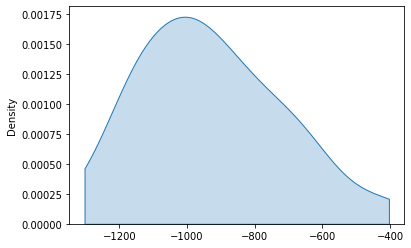

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
import seaborn as sns
# split our data into testing data and training data with sklearn
X_train, X_test, y_train, y_test = train_test_split(K, y1, test_size=0.33)
#sns.kdeplot(energy_pbe0, shade=True, cut=0)

sigma = 4000
gamma = 1.0/(2*sigma**2)
alpha = 1e-8
kernel = KernelRidge(gamma=gamma, kernel="rbf", alpha=alpha)
# find the fitting coeffecients
kernel.fit(X_train, y_train)

# and make predictions on test data
predictions = kernel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


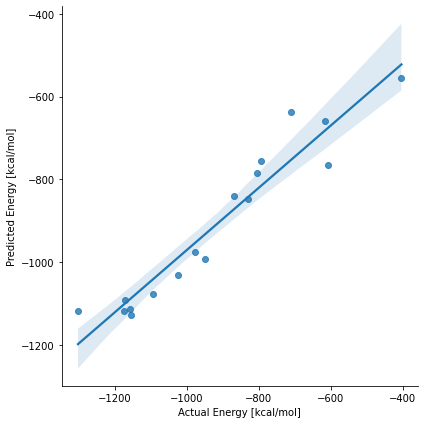

In [ ]:
data=pd.DataFrame(data={'Actual Energy [kcal/mol]': y_test, 'Predicted Energy [kcal/mol]': predictions})
sns.lmplot(x="Actual Energy [kcal/mol]",y="Predicted Energy [kcal/mol]", truncate=True, data=data, size=6)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions), "kcal/mol")
print('MSE:', metrics.mean_squared_error(y_test, predictions), "kcal/mol")
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)), "kcal/mol")

MAE: 58.69495217068567 kcal/mol
MSE: 6304.029460009081 kcal/mol
RMSE: 79.39791848662709 kcal/mol


In [ ]:
# split our data into testing data and training data with sklearn
X_train, X_test, y_train, y_test = train_test_split(K, y2, test_size=0.33)
#sns.kdeplot(energy_pbe0, shade=True, cut=0)

sigma = 4000
gamma = 1.0/(2*sigma**2)
alpha = 1e-8
kernel = KernelRidge(gamma=gamma, kernel="rbf", alpha=alpha)
# find the fitting coeffecients
kernel.fit(X_train, y_train)

# and make predictions on test data
predictions = kernel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


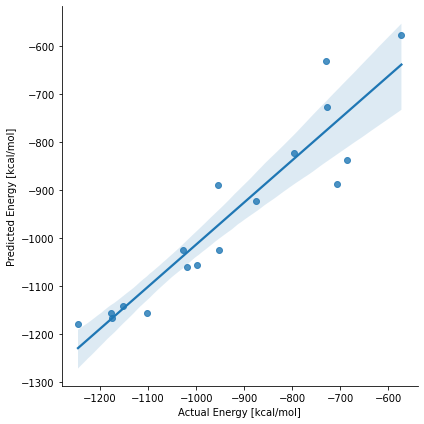

In [ ]:
data=pd.DataFrame(data={'Actual Energy [kcal/mol]': y_test, 'Predicted Energy [kcal/mol]': predictions})
sns.lmplot(x="Actual Energy [kcal/mol]",y="Predicted Energy [kcal/mol]", truncate=True, data=data, size=6)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions), "kcal/mol")
print('MSE:', metrics.mean_squared_error(y_test, predictions), "kcal/mol")
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)), "kcal/mol")

MAE: 53.511334166120776 kcal/mol
MSE: 5291.931259449055 kcal/mol
RMSE: 72.74566144760149 kcal/mol


SVM

In [ ]:
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(K, y2, test_size=0.33)
regr = svm.SVR()
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

SVR()

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


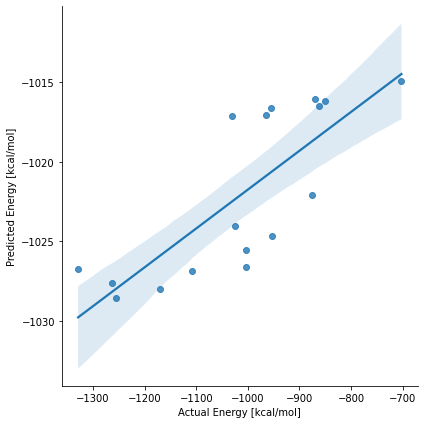

In [ ]:
data=pd.DataFrame(data={'Actual Energy [kcal/mol]': y_test, 'Predicted Energy [kcal/mol]': predictions})
sns.lmplot(x="Actual Energy [kcal/mol]",y="Predicted Energy [kcal/mol]", truncate=True, data=data, size=6)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions), "kcal/mol")
print('MSE:', metrics.mean_squared_error(y_test, predictions), "kcal/mol")
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)), "kcal/mol")

MAE: 126.94641574566386 kcal/mol
MSE: 25289.668350297306 kcal/mol
RMSE: 159.027256626961 kcal/mol


Multi Layer Neural Networks

In [ ]:
#y1 = np.asarray(y1,dtype=np.float64)

In [ ]:
y1 = y1.astype('int')
y1

array([ -417,  -711,  -563,  -403,  -858, -1006,  -860,  -707,  -724,
        -876,  -617,  -869,  -653,  -806,  -676,  -795, -1155, -1155,
       -1302, -1302, -1017,  -858,  -703, -1158, -1156, -1008, -1157,
       -1002, -1021, -1022, -1171,  -766,  -606, -1174,  -912, -1166,
       -1015, -1160, -1024, -1025,  -869,  -950,  -953, -1101,  -829,
       -1105,  -978,  -972, -1094,  -951])

In [ ]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(K, y1, test_size=0.33)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

#clf.fit(X_train, y_train)

In [ ]:
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
predictions = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


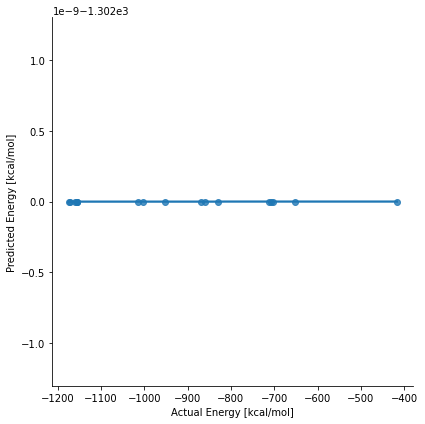

In [ ]:
data=pd.DataFrame(data={'Actual Energy [kcal/mol]': y_test, 'Predicted Energy [kcal/mol]': predictions})
sns.lmplot(x="Actual Energy [kcal/mol]",y="Predicted Energy [kcal/mol]", truncate=True, data=data, size=6)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions), "kcal/mol")
print('MSE:', metrics.mean_squared_error(y_test, predictions), "kcal/mol")
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)), "kcal/mol")

MAE: 379.1764705882353 kcal/mol
MSE: 193348.70588235295 kcal/mol
RMSE: 439.7143457772932 kcal/mol
